In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

movies=pd.read_csv(r"C:\data\data science\Study material\Data mining unsupervised learning-association rules\Datasets_Association Rules\my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [2]:
movies.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [3]:
#dropping v1.v2.v3.v4.v5 columns
final_movies=movies.drop(['V1', 'V2','V3','V4','V5'], axis=1)

In [4]:
duplicate=final_movies.duplicated()
sum(duplicate)

3

In [5]:
final_movies=final_movies.drop_duplicates()

In [6]:
final_movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [7]:
from collections import Counter # ,OrderedDict

item_frequencies = Counter(final_movies)


In [40]:
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])

In [41]:
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [42]:
frequencies

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [43]:
items

['Green Mile',
 'Braveheart',
 'LOTR',
 'Harry Potter2',
 'LOTR2',
 'Patriot',
 'Harry Potter1',
 'LOTR1',
 'Gladiator',
 'Sixth Sense']

In [27]:
#barplot of top10
import matplotlib.pyplot as plt

<ipython-input-51-1d317501215f>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(height = frequencies[0:10], x = list(range(0, 10)), color = 'rgbkymc')


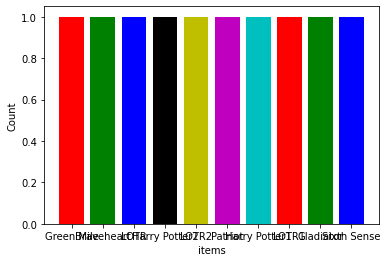

In [51]:
plt.bar(height = frequencies[0:10], x = list(range(0, 10)), color = 'rgbkymc')
plt.xticks(list(range(0, 10), ), items[0:10])
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

In [54]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(final_movies, min_support = 0.0075, max_len = 4, use_colnames = True)

In [55]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)


<ipython-input-56-db3c283df5e7>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = list(range(0, 10)), height = frequent_itemsets.support[0:10], color ='rgmyk')


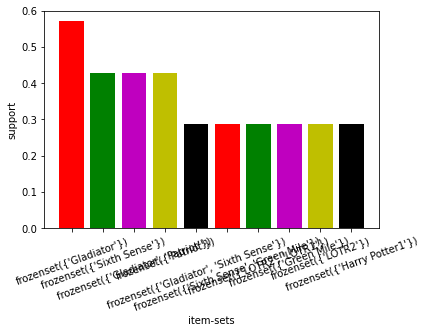

In [56]:
plt.bar(x = list(range(0, 10)), height = frequent_itemsets.support[0:10], color ='rgmyk')
plt.xticks(list(range(0, 10)), frequent_itemsets.itemsets[0:10], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()



In [67]:
rules=association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.571429,0.428571,0.428571,0.750000,1.750000,0.183673,2.285714
1,(Patriot),(Gladiator),0.428571,0.571429,0.428571,1.000000,1.750000,0.183673,inf
2,(Gladiator),(Sixth Sense),0.571429,0.428571,0.285714,0.500000,1.166667,0.040816,1.142857
3,(Sixth Sense),(Gladiator),0.428571,0.571429,0.285714,0.666667,1.166667,0.040816,1.285714
4,(Sixth Sense),(Green Mile),0.428571,0.285714,0.285714,0.666667,2.333333,0.163265,2.142857
5,(Green Mile),(Sixth Sense),0.285714,0.428571,0.285714,1.000000,2.333333,0.163265,inf
6,(LOTR2),(LOTR1),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
7,(LOTR1),(LOTR2),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
8,"(Sixth Sense, LOTR1)",(Green Mile),0.142857,0.285714,0.142857,1.000000,3.500000,0.102041,inf
9,"(Sixth Sense, Green Mile)",(LOTR1),0.285714,0.285714,0.142857,0.500000,1.750000,0.061224,1.428571


In [68]:
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
155,"(Sixth Sense, Harry Potter1)","(LOTR2, Green Mile)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
112,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
110,"(LOTR2, Sixth Sense)","(LOTR1, Harry Potter1)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
143,"(LOTR1, Green Mile)","(LOTR2, Sixth Sense)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
141,"(Sixth Sense, LOTR1)","(LOTR2, Green Mile)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
152,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
64,"(Gladiator, Green Mile)",(LOTR),0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
154,"(LOTR2, Green Mile)","(Sixth Sense, Harry Potter1)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
124,"(Sixth Sense, LOTR1)","(Harry Potter1, Green Mile)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
65,(LOTR),"(Gladiator, Green Mile)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf


In [69]:
def to_list(i):
    return (sorted(list(i)))

In [71]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]

index_rules = []


In [72]:
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


In [73]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]

In [74]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,"(Gladiator, Sixth Sense)",(LOTR),0.285714,0.142857,0.142857,0.5,3.5,0.102041,1.714286
148,"(LOTR2, Sixth Sense, Harry Potter1)",(Green Mile),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
198,"(LOTR2, LOTR1, Green Mile)",(Harry Potter1),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
62,"(Gladiator, LOTR)",(Green Mile),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
26,"(Sixth Sense, LOTR1)",(Harry Potter1),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
20,"(LOTR2, Sixth Sense)",(LOTR1),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
86,"(LOTR2, Harry Potter1)",(Green Mile),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
38,"(Sixth Sense, Harry Potter1)",(Green Mile),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
92,"(Gladiator, Sixth Sense, LOTR)",(Green Mile),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
56,"(LOTR1, Green Mile)",(Harry Potter1),0.142857,0.285714,0.142857,1.0,3.5,0.102041,inf
